In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook

## Cargar csv

In [2]:
file = "../cardio_dosis_data/CARDIOLOGIA DF_H.csv"

In [3]:
#data = pd.read_csv(file, usecols={'EDAD','PESO', 'GENERO','TALLA', 'TIEMPO','mGy','pGym','IMÁGENES','CUADROS POR SEGUNDO','PULSOS POR SEGUNDO', 'CONTRASTE'})
#df = pd.read_csv(file, 
#                   usecols={'EDAD','PESO', 'TALLA',
#                            'TIEMPO','mGy','pGym', 'IMÁGENES'})
df = pd.read_csv(file, 
                 usecols={'TIEMPO','mGy', 
                                  'IMÁGENES', 'CUADROS POR SEGUNDO', 'CONTRASTE'})
df.head()

,TIEMPO,mGy,IMÁGENES,CUADROS POR SEGUNDO,CONTRASTE
0,3.25,85.0,3,7.5,0
1,7.60,1301.0,18,7.5,120
2,10.04,128.0,5,7.5,0
3,30.60,1906.0,13,7.5,230
4,2.45,206.0,11,7.5,100


### Probando si hay valores nulos:

In [4]:
type(df)
df.isin(['NaN']).any()

TIEMPO                 False
mGy                    False
IMÁGENES               False
CUADROS POR SEGUNDO    False
CONTRASTE              False
dtype: bool

In [5]:
df_val = df.values
len(df_val)

593

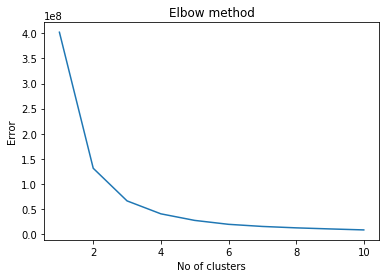

In [6]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_val)
    kmeans.fit(df_val)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [12]:
k_clusters = 4

kmeans = KMeans(n_clusters = k_clusters)
y_kmeans = kmeans.fit_predict(df_val)
print(y_kmeans)

kmeans.cluster_centers_


[1 2 1 0 1 1 1 1 1 2 2 1 2 2 2 2 1 1 1 1 2 0 0 2 2 0 1 2 0 2 1 1 3 0 1 2 0
 2 1 1 2 1 1 3 1 0 0 1 1 2 2 1 2 1 1 1 1 2 1 1 2 1 1 1 2 0 2 2 2 1 2 1 1 0
 2 1 1 1 1 1 1 1 1 0 0 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 0 2 1 1 0 1 1 1
 1 1 1 1 1 3 0 1 2 2 1 2 1 2 1 3 1 3 1 1 2 1 1 2 0 0 1 1 2 1 0 1 1 1 1 1 1
 1 1 2 2 2 1 1 1 0 1 1 0 1 1 0 0 2 1 1 2 0 1 2 1 1 1 0 0 2 1 2 2 0 0 1 1 2
 2 1 2 1 1 1 1 1 0 1 1 1 3 1 2 1 2 0 1 1 1 1 3 0 1 2 2 1 2 1 1 3 1 1 2 2 0
 1 1 0 2 1 1 1 2 2 2 1 2 1 0 2 0 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2
 1 1 1 1 2 2 2 2 2 1 0 2 1 1 1 2 2 2 2 2 1 2 1 1 1 2 0 1 1 1 1 1 1 1 0 1 2
 1 1 1 2 3 0 1 1 2 1 1 2 1 1 2 1 1 0 1 2 1 1 2 2 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 2 1 1 1 1 1 0 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 1 0 1 1 2 1
 0 0 1 1 1 1 0 2 1 1 1 1 1 3 1 1 1 2 1 1 3 1 1 1 1 0 1 1 1 2 1 1 1 2 1 2 1
 2 1 2 1 1 2 1 2 2 0 1 1 2 0 1 0 2 1 1 1 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2
 1 1 1 0 0 2 0 1 1 0 1 0 2 3 0 1 1 1 1 2 1 1 1 1 1 0 3 2 1 2 0 2 2 2 1 0 1
 1 1 1 1 2 1 1 2 2 1 0 1 

array([[  21.36614286, 2155.48571429,   27.74285714,    7.66428571,
         179.07142857],
       [   5.6217847 ,  280.19376771,    9.79320113,    7.53541076,
          48.11331445],
       [  11.88006452, 1063.33419355,   19.9483871 ,    7.74516129,
         120.61935484],
       [  31.03866667, 3693.2       ,   38.66666667,    7.5       ,
         260.46666667]])

In [8]:
lista = list(df)
centroidestxt = open('centroides.txt', 'w')
print(lista)
centroidestxt.write(str(lista))
centroidestxt.write("\n")
for i, item in enumerate(kmeans.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i+1, item))
    centroidestxt.write("Centro del centroide No {} es: \n {} \n".format(i+1, item))

centroidestxt.close()

['TIEMPO', 'mGy', 'IMÁGENES', 'CUADROS POR SEGUNDO', 'CONTRASTE']
Centro del centroide No 1 es: 
 [  5.6217847  280.19376771   9.79320113   7.53541076  48.11331445] 

Centro del centroide No 2 es: 
 [  21.36614286 2155.48571429   27.74285714    7.66428571  179.07142857] 

Centro del centroide No 3 es: 
 [  11.88006452 1063.33419355   19.9483871     7.74516129  120.61935484] 

Centro del centroide No 4 es: 
 [  31.03866667 3693.2          38.66666667    7.5         260.46666667] 



In [26]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

clusterlist = []

for i in range(k_clusters):
    clusterlist.append(cluster_map[cluster_map.cluster == i])
    print("Elementos en cluster {} : {}".format(i+1, len(clusterlist[i])))
    index_elements = clusterlist[i]['data_index']
    clusterlist[i]['data_index'].to_csv('indices_cluster_'+str(i+1)+'.txt', 
                                  header=True, index=None, sep='\n')
#cluster1 = cluster_map[cluster_map.cluster == 0]
#cluster2 = cluster_map[cluster_map.cluster == 1]
#cluster3 = cluster_map[cluster_map.cluster == 2]
#cluster4 = cluster_map[cluster_map.cluster == 3]


Elementos en cluster 1 : 70
Elementos en cluster 2 : 353
Elementos en cluster 3 : 155
Elementos en cluster 4 : 15


In [21]:
clusterlist[0]['data_index']

3        3
21      21
22      22
25      25
28      28
      ... 
529    529
566    566
579    579
583    583
588    588
Name: data_index, Length: 70, dtype: int64

In [22]:
clusterlist[1]['data_index']

0        0
2        2
4        4
5        5
6        6
      ... 
582    582
587    587
589    589
591    591
592    592
Name: data_index, Length: 353, dtype: int64

In [23]:
clusterlist[2]['data_index']

1        1
9        9
10      10
12      12
13      13
      ... 
581    581
584    584
585    585
586    586
590    590
Name: data_index, Length: 155, dtype: int64

In [24]:
clusterlist[3]['data_index']

32      32
43      43
116    116
126    126
128    128
197    197
207    207
216    216
300    300
383    383
390    390
457    457
470    470
527    527
544    544
Name: data_index, dtype: int64